source: https://www.ekonomifakta.se/Fakta/Regional-statistik/Alla-lan/Stockholms-lan/Stockholm/?var=17249&compare=1&graph=/17249/199,212,135,58-1,2/all/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


C:\Users\DEKI_\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('MedianLön.xlsx', header=[0, 1])

In [3]:
df.head(10)

Medianinkomst                                                            
             År      Stockholm   Sverigemedel          Malmö       Göteborg
0          1991  205279.581866  190325.440141  180960.220070  191382.803697
1          1992  207273.168317  193386.013775  183339.987086  192942.806715
2          1993  202781.262336  189939.860197  178509.601151  187399.802632
3          1994  202559.438592  190004.346881  176128.974930  185562.902052
4          1995  203195.956750  191631.477394  176187.927394  186841.902669
5          1996  209845.938555  197200.191406  179143.839414  191410.200742
6          1997  214865.216829  201700.485775  181733.310105  194328.503148
7          1998  224726.687626  210506.336226  189488.953307  203462.261323
8          1999  236117.645293  219274.608756  195023.933747  212582.337272
9          2000  244828.612927  225437.785539  197440.221596  219583.677637

In [4]:
df = df.iloc[9:]

In [5]:
df

Medianinkomst                                                            
              År      Stockholm   Sverigemedel          Malmö       Göteborg
9           2000  244828.612927  225437.785539  197440.221596  219583.677637
10          2001  250772.826170  229555.692250  199345.721153  224808.080681
11          2002  253243.524120  233788.123277  202936.248057  229817.787353
12          2003  254608.477562  236893.653937  205463.570838  233604.904027
13          2004  258670.858166  241709.257844  207920.038968  238600.634957
14          2005  263326.113124  245892.452782  210599.204422  242367.534094
15          2006  269538.542537  250020.833861  213400.376750  246613.324960
16          2007  276013.312967  254327.523046  212618.083336  251754.572648
17          2008  280844.749010  256573.369482  211639.351286  254540.099165
18          2009  287277.035340  261573.861176  213091.373457  256447.656678
19          2010  287416.253114  259424.769261  209374.625453  252017.221314
20          2011  288885.469255  259853.774974  220051.316604  253554.850528
21          2012  297572.599745  266629.794176  226283.669987  262717.297104
22          2013  305757.746768  273342.322454  235277.365249  269914.356365
23          2014  312995.979808  278355.126288  240121.336534  275324.886344
24          2015  325127.483708  288332.170991  250460.248189  288599.406861
25          2016  334151.206396  296048.147015  259755.232405  299358.249976
26          2017  339210.568595  300419.902300  263958.295458  305451.991866
27          2018  344009.308648  303720.014890  267170.906912  309813.622960
28          2019  348496.066894  306283.676360  272496.515108  313004.557530
29          2020  353294.039950  310648.657180  279190.254942  315851.880180
30          2021  357677.000000  314116.000000  283481.000000  318802.000000

In [6]:
# Set the 'År' column as the index
df.set_index(df.columns[0], inplace=True)

In [7]:
# Convert the year column to datetime format and set it as the index
df['Year'] = pd.to_datetime(df.index, format='%Y')
df.set_index('Year', inplace=True)

# Now you can use resample without encountering the error
df = df.resample('MS').ffill()


In [8]:
df

Medianinkomst                                             
                Stockholm   Sverigemedel          Malmö       Göteborg
Year                                                                  
2000-01-01  244828.612927  225437.785539  197440.221596  219583.677637
2000-02-01  244828.612927  225437.785539  197440.221596  219583.677637
2000-03-01  244828.612927  225437.785539  197440.221596  219583.677637
2000-04-01  244828.612927  225437.785539  197440.221596  219583.677637
2000-05-01  244828.612927  225437.785539  197440.221596  219583.677637
...                   ...            ...            ...            ...
2020-09-01  353294.039950  310648.657180  279190.254942  315851.880180
2020-10-01  353294.039950  310648.657180  279190.254942  315851.880180
2020-11-01  353294.039950  310648.657180  279190.254942  315851.880180
2020-12-01  353294.039950  310648.657180  279190.254942  315851.880180
2021-01-01  357677.000000  314116.000000  283481.000000  318802.000000

[253 rows x 4 columns]

In [9]:
def plot_data_with_trendline(df, include_trendline=False):
    """
    Plot line charts for each column in the DataFrame with an optional trendline.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing time-series data.
    - include_trendline (bool, optional): Whether to include a trendline in the plot. Default is False.

    Returns:
    None
    
    # Example usage:
    # plot_data_with_trendline(your_dataframe, include_trendline=True)  # Include trendline
    # plot_data_with_trendline(your_dataframe, include_trendline=False)  # Exclude trendline

    """
    # Generate an extended date range to cover the entire period
    start_date = pd.to_datetime('2000-01-01')
    end_date = pd.to_datetime('2023-09-01')
    extended_index = pd.date_range(start=start_date, end=end_date, freq='MS')

    # Make sure the DataFrame has the extended index
    df = df.reindex(extended_index)

    # Calculate the standard deviation for each column
    std_dev = df.std()

    # Fill missing values using the forward fill method
    df = df.ffill()

    # Set up the plot layout
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
    axes = axes.flatten()

    # Iterate through each column for plotting
    for i, (column, color) in enumerate(zip(df.columns, sns.color_palette("husl", len(df.columns)))):
        # Plot the original data
        sns.lineplot(x=df.index, y=df[column], ax=axes[i], color=color, label=column, linewidth=2)

        # Optionally, add a trendline
        if include_trendline:
            # Fit a linear trend line using polyfit
            trend_line_coeff = np.polyfit(range(len(df)), df[column], 1)
            trend_line = np.polyval(trend_line_coeff, range(len(df)))

            # Plot the trend line in black
            axes[i].plot(df.index, trend_line, color='black', linestyle='--', label='Trend Line', linewidth=2)

        # Set plot attributes
        axes[i].set_title(column)
        axes[i].set_xlabel('Datum')
        axes[i].set_ylabel('Sysselsättning')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend()

    # Remove empty subplots if there are more subplots than columns
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()

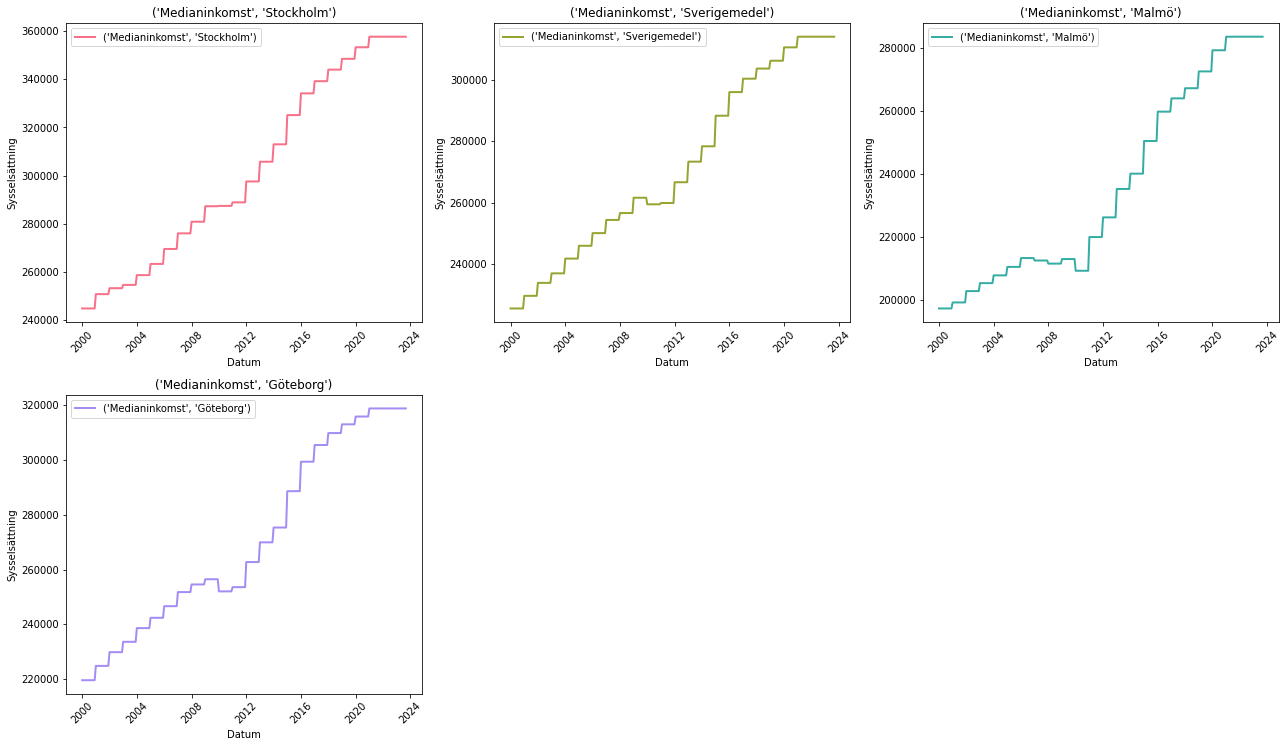

In [10]:
plot_data_with_trendline(df)

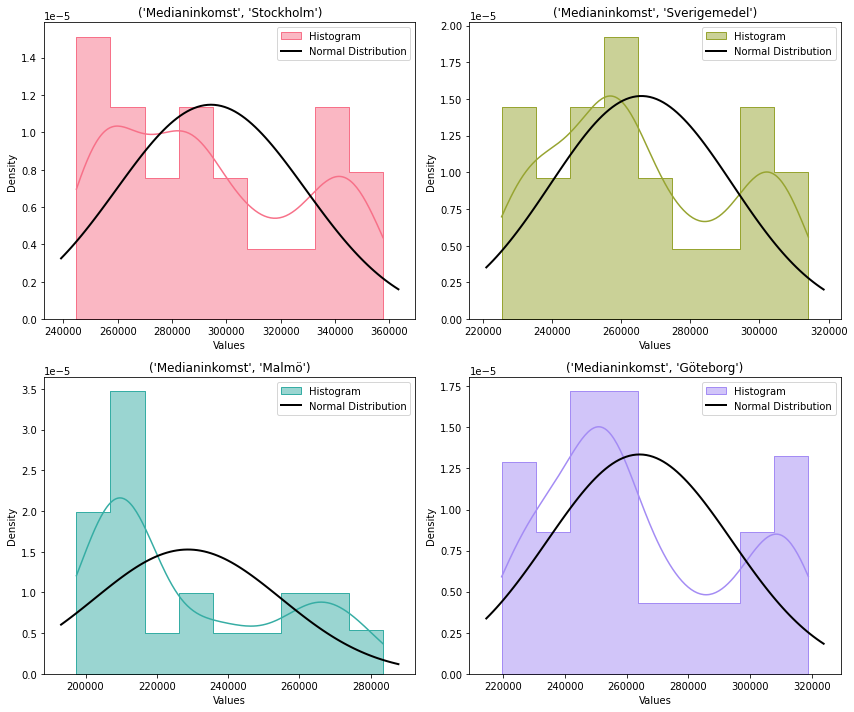

In [11]:

# Define a color palette with different colors for each histogram
palette = sns.color_palette("husl", len(df.columns))

# Calculate the number of rows and columns needed for the subplots
num_cols = min(len(df.columns), 2)
num_rows = -(-len(df.columns) // num_cols)  # Ceiling division

# Set the figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Loop through each column and create a separate histogram with normal distribution curve
for i, (column, color) in enumerate(zip(df.columns, palette)):
    # Plot histogram
    sns.histplot(df[column], kde=True, ax=axes[i], color=color, label='Histogram', element="step", stat="density")
    
    # Plot normal distribution curve
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = df[column].mean(), df[column].std()
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

plt.show()